In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
import xarray as xr

mask = xr.open_dataset("Data/Other/NW_masks.nc")
station_coords = pd.read_csv('Data/Other/stations_coordinates.csv')

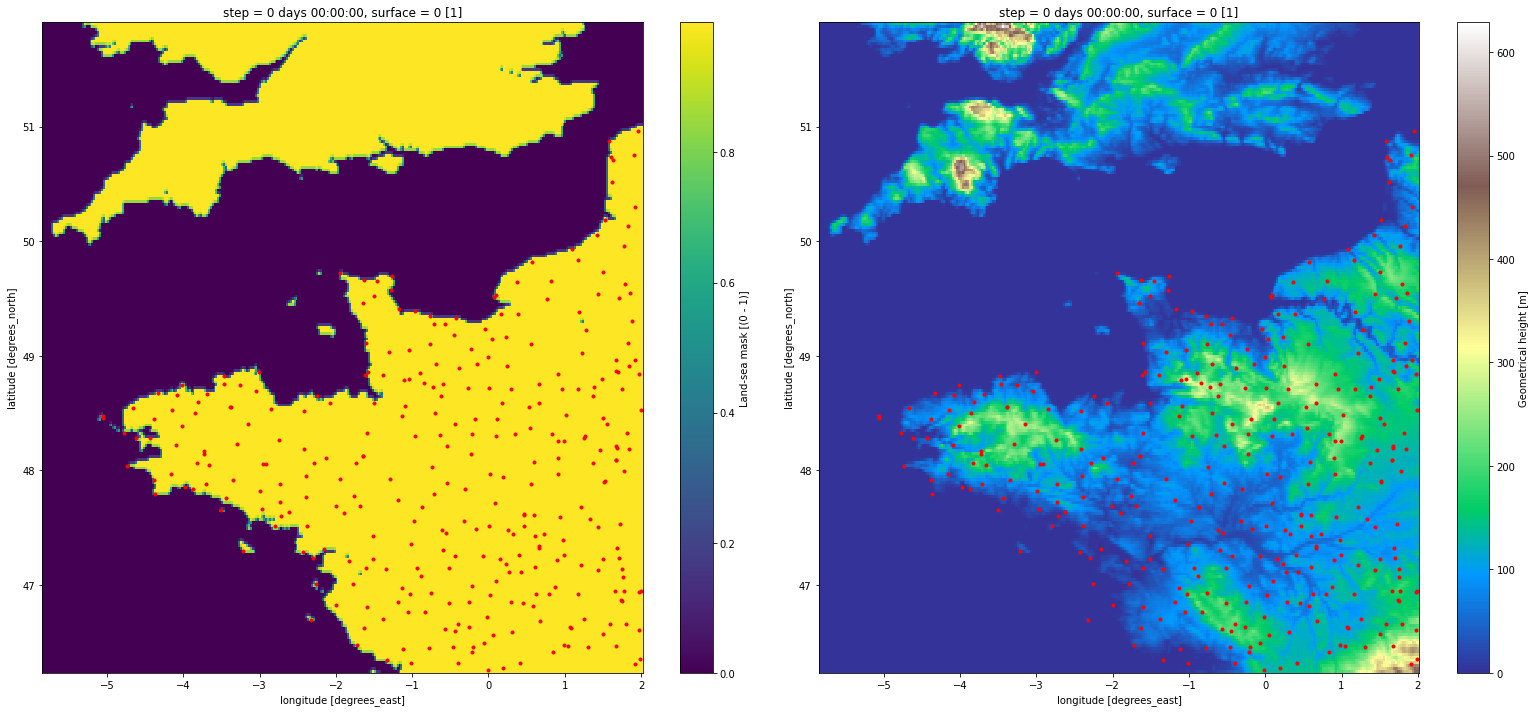

In [4]:
fig, ax = plt.subplots(1,2, figsize=(22, 10))

mask["lsm"].plot(ax=ax[0])
ax[0].plot(station_coords["lon"], station_coords["lat"], "r.")
vmin = mask["p3008"].values.min()
vmax = mask["p3008"].values.max()
mask["p3008"].plot(ax=ax[1], cmap="terrain", vmin=vmin, vmax=vmax)
ax[1].plot(station_coords["lon"], station_coords["lat"], "r.")
plt.tight_layout()
plt.show()

In [5]:
year = "2017"
date = "0214"
model = "arome"
# data = xr.open_dataset(f"Data/Train/2D_{model}_{year}/2D_{model}_{year}{date}.nc")
data = xr.open_dataset(f"Data/Train/X_forecast/2D_{model}_{year}{date}.nc")

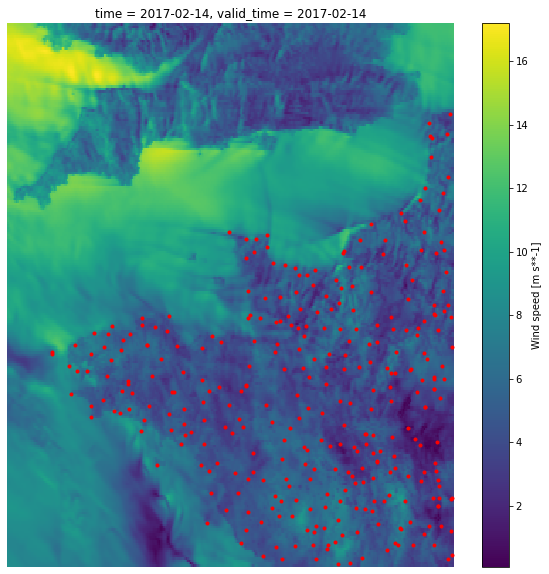

In [14]:
feature = "tp"
plt.figure(figsize=(10,10))
data["ws"].sel(valid_time='2017-02-14T00:00:00.000000000').plot(ax=plt.gca())
plt.plot(station_coords["lon"], station_coords["lat"], "r.")
plt.axis('off')
plt.show()

In [15]:
station = station_coords.iloc[10]
station_lat, station_lon = station[["lat", "lon"]]
window_size = 8 * 0.025
min_lat = station_lat - window_size
max_lat = station_lat + window_size
min_lon = station_lon - window_size
max_lon = station_lon + window_size

mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon)
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)

cropped = data.where(mask_lon & mask_lat, drop=True)
cropped.to_dataframe()["tp"]

valid_time  latitude   longitude  Id    
2017-02-14  47.820999  -2.817     409_0          NaN
                                  409_1          NaN
                                  409_2          NaN
                                  409_3          NaN
                                  409_4          NaN
                                              ...   
2017-02-15  47.445999  -2.442     409_20    4.006352
                                  409_21    4.006352
                                  409_22    4.006352
                                  409_23    4.006352
                                  409_24    4.006352
Name: tp, Length: 160000, dtype: float32

In [34]:
cropped_samples = []
count_valid = 0
n = len(station_coords)
for i in tqdm(range(n)):
    station = station_coords.iloc[i]
    station_lat, station_lon = station[["lat", "lon"]]
    window_size = 8 * 0.025
    min_lat = station_lat - window_size
    max_lat = station_lat + window_size
    min_lon = station_lon - window_size
    max_lon = station_lon + window_size

    mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon)
    mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)

    cropped = data.where(mask_lon & mask_lat, drop=True)
    if cropped["ws"].shape == (25, 16, 16):
        count_valid += 1
        cropped_samples.append(cropped)

print(len(station_coords), count_valid, count_valid / len(station_coords))

100%|██████████| 325/325 [00:10<00:00, 29.65it/s]

325 288 0.8861538461538462


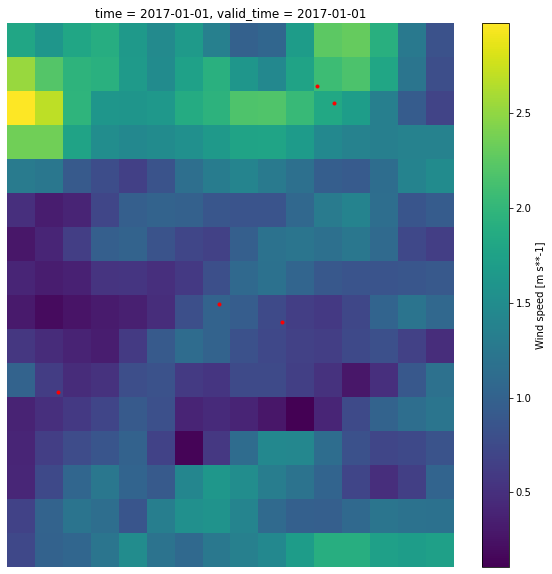

In [35]:
feature = "ws"
plt.figure(figsize=(10,10))
cropped_samples[0]["ws"].sel(valid_time='2017-01-01T00:00:00.000000000').plot(ax=plt.gca())
plt.plot(station_coords["lon"], station_coords["lat"], "r.")
plt.axis('off')
plt.show()

In [45]:
data#.loc[dict(latitude=slice(47, 50))]

<xarray.Dataset>
Dimensions:     (latitude: 58, longitude: 80, valid_time: 25)
Coordinates:
    time        datetime64[ns] 2016-01-01
  * latitude    (latitude) float32 51.9 51.8 51.7 51.6 ... 46.5 46.4 46.3 46.2
  * longitude   (longitude) float32 -5.842 -5.742 -5.642 ... 1.858 1.958 2.058
  * valid_time  (valid_time) datetime64[ns] 2016-01-01 ... 2016-01-02
Data variables:
    ws          (valid_time, latitude, longitude) float32 5.607 5.72 ... 7.309
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-29T11:06:41 GRIB to CDM+CF via cfgrib-0....

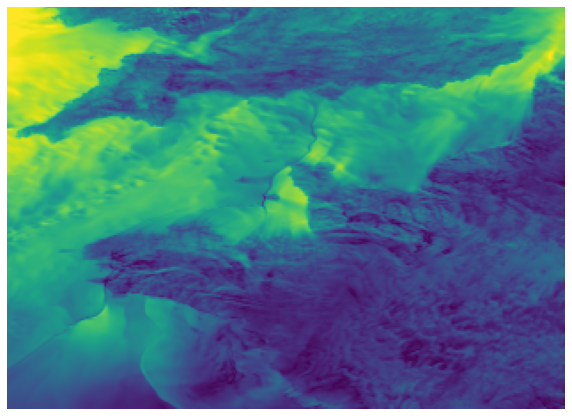

In [48]:
year = "2017"
date = "0101"
model = "arpege"
data = xr.open_dataset(f"Data/Train/2D_{model}_{year}/3D_{model}_{year}{date}.nc")

feature = ""
data["ws"].values.shape
plt.figure(figsize=(10,10))
I = plt.imshow(data["ws"].values[0])
plt.axis('off')
for i in range(24):
    I.set_data(data["ws"].values[i+1])
    plt.pause(.1)
plt.show()